In [1]:
import pandas as pd
import numpy as np

## 1. Data pre-processesing

Load the data set and display the first 10 rows of data.

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/DRK-02/COVID-19-Analysis/main/Data_Set.csv?token=GHSAT0AAAAAAB2YYV5FVHKX2HSFKHYNUEZUY3KHLUA')
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


Check the total number of NULL values in each column and remove those particular columns from the dataset.

In [13]:
df.isna().sum()

SNo                   0
ObservationDate       0
Province/State     4956
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [14]:
df.drop(['Province/State'], axis = 1, inplace = True)
df.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Check the summary of the dataset and print the total number of available features.

In [15]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,10671.000000,10671.000000,10671.000000,10671.000000
mean,5336.000000,993.821666,40.667229,289.508481
std,3080.596695,6268.835379,398.618024,3010.809184
min,1.000000,0.000000,0.000000,0.000000
25%,2668.500000,3.000000,0.000000,0.000000
50%,5336.000000,31.000000,0.000000,0.000000
75%,8003.500000,229.000000,2.000000,14.000000
max,10671.000000,105792.000000,12428.000000,63153.000000


In [16]:
print('Available features 4')

Available features 4


Convert all columns with object data types into integer values. Now check the summary of the dataset. What is the function being used do?

In [18]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

'''
The function used here is the Label Encoder function. It is used to encode object data types to integer
values so that they can also be used as features.
'''

df.describe()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
count,10671.000000,10671.000000,10671.000000,10671.000000,10671.000000,10671.000000,10671.000000
mean,5336.000000,46.817543,126.291350,1184.258270,993.821666,40.667229,289.508481
std,3080.596695,17.674161,62.908409,619.354947,6268.835379,398.618024,3010.809184
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2668.500000,37.000000,80.000000,691.500000,3.000000,0.000000,0.000000
50%,5336.000000,51.000000,122.000000,1365.000000,31.000000,0.000000,0.000000
75%,8003.500000,61.000000,197.000000,1805.000000,229.000000,2.000000,14.000000
max,10671.000000,69.000000,214.000000,1813.000000,105792.000000,12428.000000,63153.000000


Plot the heatmap of the correlation matrix and print the name of the feature corresponding to X-axis with the highest value and the target variable.

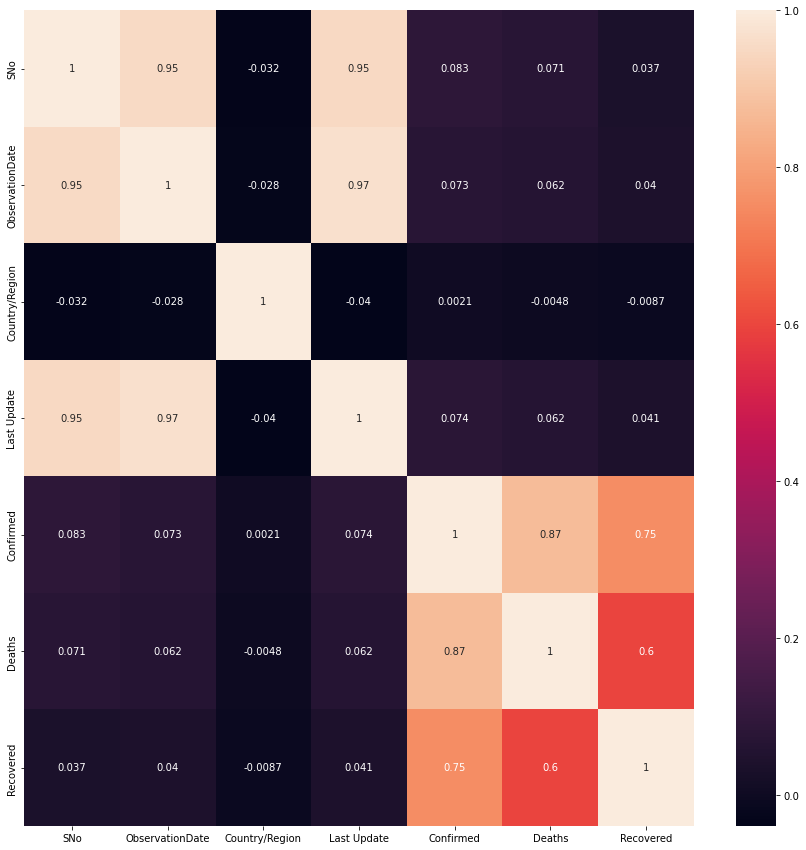

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [20]:
print('Target variable is Confirmed')

Target variable is Confirmed


Plot a pairplot to see the distribution of every pair of features. What does the pairplot indicate?

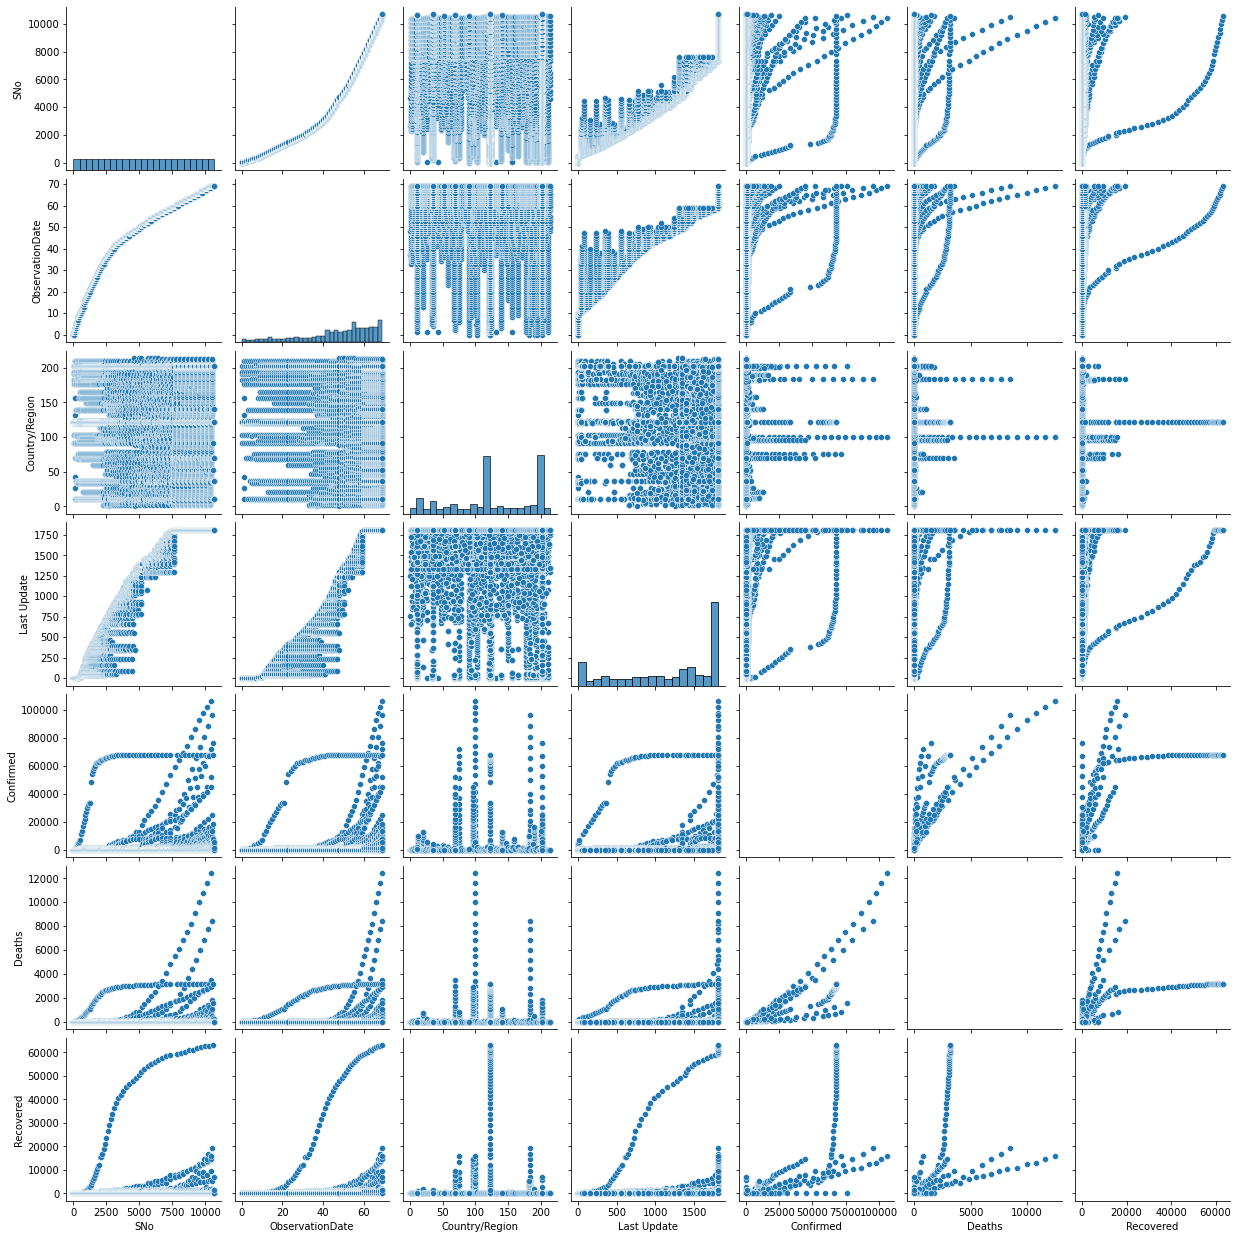

In [21]:
'''
This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and 
the diagonal plots are the univariate plots.
'''

sns.pairplot(df)

Plot a scatter graph between confirmed and deaths and mention how efficient your model would be if you draw a prediction line through the plot.

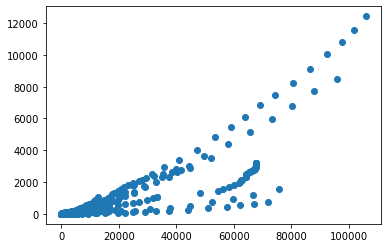

In [22]:
'''
If a straight prediction line is drawn through the data then the prediction would be very accurate as most
of the data is clustered around the line and hence the error would be less.
'''

plt.scatter(df.Confirmed, df.Deaths)